In [69]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [3]:
def tanimoto(vector1, vector2):
    set_bits = 0
    shared_bits = 0
    for bit1, bit2 in zip(vector1, vector2):
        if bit1 or bit2: # at least one vector has this feature
            set_bits += 1
            if bit1 and bit2: # both vectors have this feature
                shared_bits += 1
    return shared_bits / set_bits

# and check our implementation on several vectors
print(tanimoto([1, 1, 0, 0], [0, 0, 1, 1])) # share nothing
print(tanimoto([0, 1, 1, 0], [1, 0, 1, 0])) # share bit of 3
print(tanimoto([1, 1, 1, 1], [0, 0, 1, 1])) # share 2 bits of 4
print(tanimoto([1, 1, 1, 1], [0, 1, 1, 1])) # share 3 bits of 4
print(tanimoto([1, 1, 0, 0], [1, 1, 0, 0])) # share 2 bits of 2
print(tanimoto([1, 0, 0, 0], [0, 0, 0, 1])) # share 2 bits of 2

0.0
0.3333333333333333
0.5
0.75
1.0
0.0


In [5]:
with open('VDR_IC50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    vdr_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('cdd2021/data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [23:58:29] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [23:58:39] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [23:58:39] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [23:58:39] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [23:58:40] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [23:58:40] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [23:58:40] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [23:58:40] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [23:58:40] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [23:58:40] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [23:58:40] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit 

RDKit ERROR: [23:58:40] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [23:58:40] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [23:58:40] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [23:58:40] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [23:58:40] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [23:58:40] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [23:58:40] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [23:58:40] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [23:58:40] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [23:58:40] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [23:58:40] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [23:58:41] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [23:58:41] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [23:58:41] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [23:58:41] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [23:58:42] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [23:58:42] ERROR: Could not sanitize molecule ending on line 1151592


In [6]:
from rdkit.Chem import MACCSkeys
fp1 = MACCSkeys.GenMACCSKeys(drugs[123])
fp2 = MACCSkeys.GenMACCSKeys(drugs[666])
print(fp1.ToBitString())
print(fp2.ToBitString())

00000000000000000000000000000000000000000000000000000100000000000000000000000000000010000100000001000000000000000100000000010001000101010001000110100011101011110111110
00000000000000000000000000000010000000000000000001000000010000000000000000100000000001100000010100101100010011011101101000110110000010000110010011111100111111111111110


In [8]:
tanimoto(fp1, fp2)

0.25

In [10]:
DataStructs.TanimotoSimilarity(fp1, fp2)


0.25

In [42]:
from rdkit.Chem import MACCSkeys
fp1 = MACCSkeys.GenMACCSKeys(vdr_ligands[123])
fp2 = MACCSkeys.GenMACCSKeys(vdr_ligands[333])
print(fp1.ToBitString())
print(fp2.ToBitString())

00000000000000000000000000000000001000000000000000100100010000000010000000001000000100000101000010010100110010001001101000010001110110000101110101110110101101011001110
00000000000000000000000010000000000000000000000001010001101111111001001101010001011001101001111101101010000000111000011101101100111011011110101011111011011110111111110


In [43]:
tanimoto(fp1, fp2)

0.1958762886597938

In [11]:
vdr_ligands_maccs = [MACCSkeys.GenMACCSKeys(m) for m in vdr_ligands]
drugs_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugs]

In [44]:
def similarity_search(query_fp, searched_fp_set, cutoff=0.8):
    # we have no index, so we will have to just iterate through the entire searched set
    hits = []
    for i, fp in enumerate(searched_fp_set):
        similarity = DataStructs.TanimotoSimilarity(query_fp, fp)
        if similarity >= cutoff: # similar enough for consideration
            hits.append((i, similarity))
    return sorted(hits, key=lambda x: x[1], reverse=True) # stronger hits first

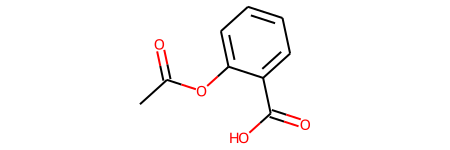

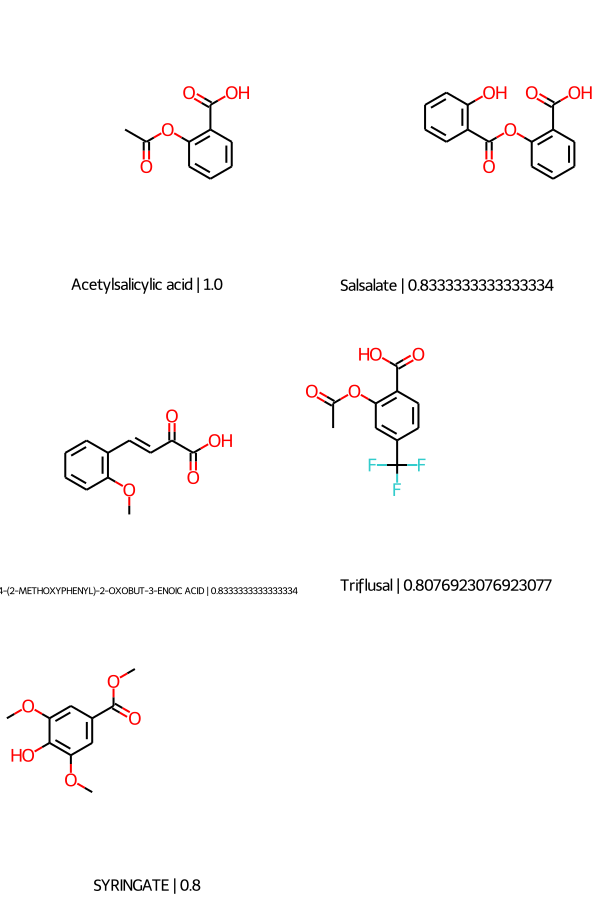

In [45]:

aspirin = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
aspirin_fp = MACCSkeys.GenMACCSKeys(aspirin)
hits = similarity_search(aspirin_fp, drugs_maccs)
display(aspirin)
Draw.MolsToGridImage([drugs[hit[0]] for hit in hits],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=["{} | {}".format(drugs[hit[0]].GetProp('GENERIC_NAME'), hit[1]) for hit in hits])

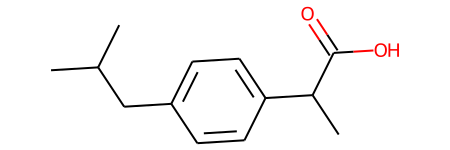

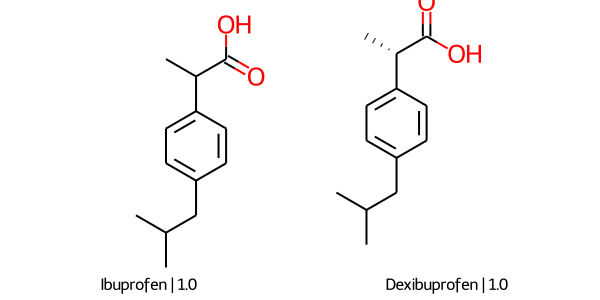

In [47]:

ibuprofen = Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')
ibuprofen_fp = MACCSkeys.GenMACCSKeys(ibuprofen)
hits = similarity_search(ibuprofen_fp, drugs_maccs)
display(ibuprofen)
Draw.MolsToGridImage([drugs[hit[0]] for hit in hits],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=["{} | {}".format(drugs[hit[0]].GetProp('GENERIC_NAME'), hit[1]) for hit in hits])

In [48]:
hits = similarity_search(vdr_ligands_maccs[0], drugs_maccs)
hits

[(3250, 0.88),
 (1133, 0.8679245283018868),
 (1898, 0.8679245283018868),
 (4449, 0.8461538461538461),
 (3713, 0.84),
 (955, 0.8392857142857143),
 (4656, 0.8363636363636363),
 (4657, 0.8363636363636363),
 (4658, 0.8363636363636363),
 (1098, 0.8333333333333334),
 (839, 0.8269230769230769),
 (3054, 0.8235294117647058),
 (969, 0.8214285714285714),
 (278, 0.8181818181818182),
 (28, 0.8163265306122449),
 (4454, 0.8163265306122449),
 (520, 0.8076923076923077),
 (625, 0.8076923076923077),
 (742, 0.8076923076923077),
 (728, 0.8070175438596491),
 (1548, 0.8070175438596491),
 (396, 0.8),
 (1212, 0.8),
 (1223, 0.8)]

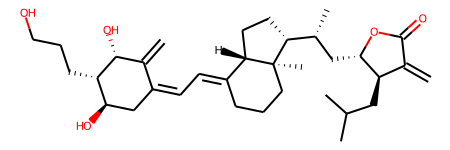

In [49]:
vdr_ligands[0]

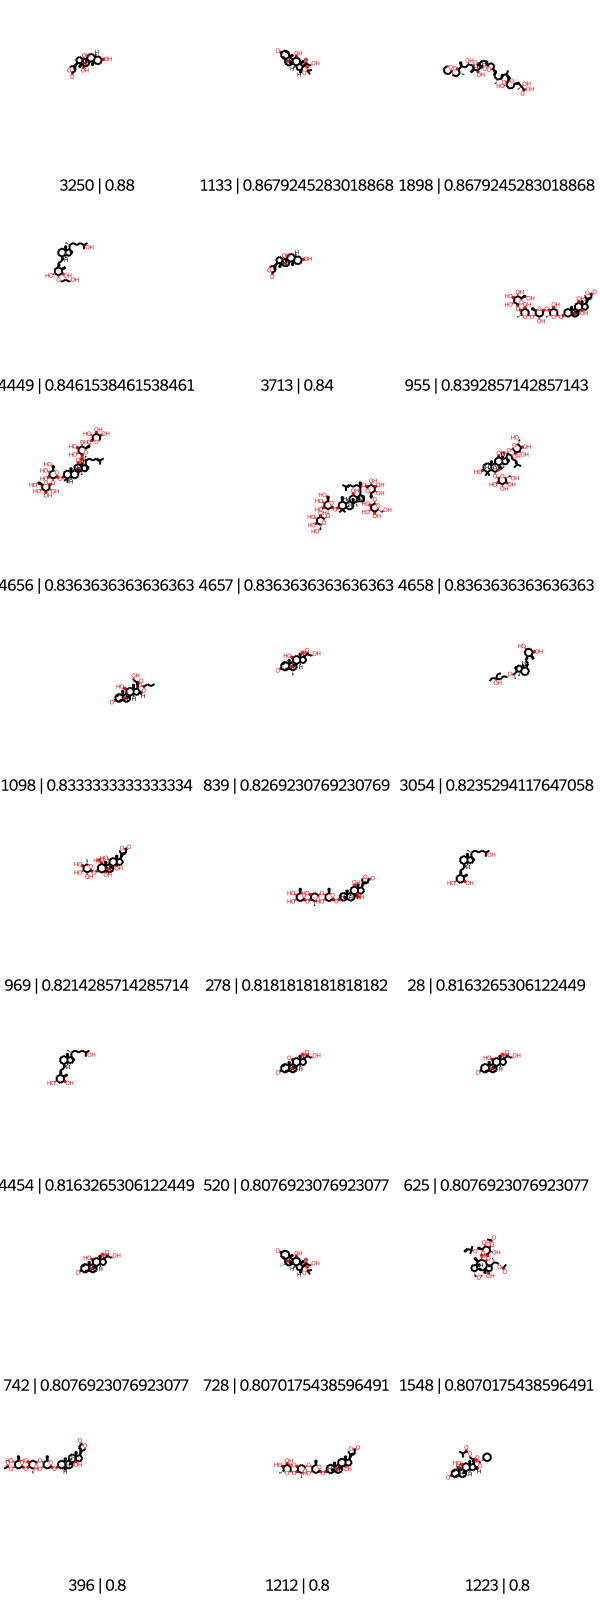

In [50]:
Draw.MolsToGridImage([drugs[hit[0]] for hit in hits], legends=["{} | {}".format(hit[0], hit[1]) for hit in hits])

In [51]:
vdr_ligands_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)
                     for m in vdr_ligands]
drugs_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)
              for m in drugs]

In [53]:
vdr_ligands_ecfp[0].ToBitString()

'010010001000000000000000000000010101100000000000000000000010000010000000000000001000000100000000001000000010000000000010000000000000010001100010000000000000000000001000000000000000000000000000000000000000001000010000000000100000000101000000000100000010000000000000000000000000000000010000000000000001010000000000001000000000000000000011100000100000000000001000010000000000000000000000000000000001000000000000000000000000000000000000000000000000100000000100000000000000000011000010000000000000000000000000000000000100010000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000010000000000000001000001000000000000000001000001000000000000100000000100000000000000010000000000000000000100000000010000000000000000000000000100100000000000000000000000000000000000000000000000000000100000000000000010000000010000000000000000100000000000000000000000000000000000001001000000000000000000000000000000100001000000000000000000000000000000000000000100000000000000000000000001000000

In [56]:
hits = similarity_search(vdr_ligands_ecfp[3], drugs_ecfp)
hits

[(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]

In [22]:
DataStructs.TanimotoSimilarity(vdr_ligands_ecfp[0], drugs_ecfp[333])

0.09375

In [26]:
DataStructs.TanimotoSimilarity(vdr_ligands_ecfp[0], drugs_ecfp[400])

0.0

In [27]:
vdr_ligands_queries = [(i, similarity_search(ligand_ecfp, drugs_ecfp))
                     for i, ligand_ecfp in enumerate(vdr_ligands_ecfp)]
vdr_ligands_queries

[(0, []),
 (1, []),
 (2, [(1372, 1.0), (4672, 1.0), (1857, 0.8148148148148148)]),
 (3, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (4, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (5, []),
 (6, []),
 (7, []),
 (8, []),
 (9, [(3054, 1.0)]),
 (10, []),
 (11, []),
 (12, []),
 (13, []),
 (14, []),
 (15, []),
 (16, []),
 (17, []),
 (18, []),
 (19, []),
 (20, []),
 (21, []),
 (22, []),
 (23, []),
 (24, []),
 (25, []),
 (26, []),
 (27, []),
 (28, []),
 (29, []),
 (30, [(2344, 1.0), (2374, 0.8275862068965517)]),
 (31, []),
 (32, []),
 (33, []),
 (34, []),
 (35, [(3200, 1.0)]),
 (36, []),
 (37, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (38, []),
 (39, []),
 (40, []),
 (41, []),
 (42, []),
 (43, []),
 (44, []),
 (45, []),
 (46, []),
 (47, []),
 (48, []),
 (49, []),
 (50, []),
 (51, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (52, []),
 (53, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (54, []),
 (55, []),
 (56, []),
 (57, []),
 (58, [])

In [28]:
vdr_ligand_hits = [hit for hit in vdr_ligands_queries if hit[1]]
vdr_ligand_hits

[(2, [(1372, 1.0), (4672, 1.0), (1857, 0.8148148148148148)]),
 (3, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (4, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (9, [(3054, 1.0)]),
 (30, [(2344, 1.0), (2374, 0.8275862068965517)]),
 (35, [(3200, 1.0)]),
 (37, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (51, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (53, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (60, [(3054, 1.0)]),
 (64, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (69, [(1372, 1.0), (4672, 1.0), (1857, 0.8148148148148148)]),
 (74, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (87, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (110, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (124, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (175, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (194, [(4358, 1.0), (6516, 1.0)]),
 (196, [(3054, 0.8405797101449275)]),
 (212, [(4358,

In [29]:
len(vdr_ligands_queries), len(vdr_ligand_hits)

(643, 37)

Naslo to 37 ligandu z 643 ktere maji podobnost z DrugBank

In [30]:
vdr_ligand_hits[1]

(3, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)])

In [60]:
vdr_ligand_hits

[(2, [(1372, 1.0), (4672, 1.0), (1857, 0.8148148148148148)]),
 (3, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (4, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (9, [(3054, 1.0)]),
 (30, [(2344, 1.0), (2374, 0.8275862068965517)]),
 (35, [(3200, 1.0)]),
 (37, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (51, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (53, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (60, [(3054, 1.0)]),
 (64, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (69, [(1372, 1.0), (4672, 1.0), (1857, 0.8148148148148148)]),
 (74, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (87, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (110, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (124, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (175, [(28, 1.0), (4454, 1.0), (1247, 0.8166666666666667)]),
 (194, [(4358, 1.0), (6516, 1.0)]),
 (196, [(3054, 0.8405797101449275)]),
 (212, [(4358,

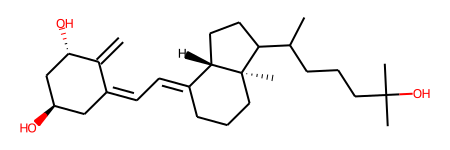

In [63]:
vdr_ligands[vdr_ligand_hits[36][0]]

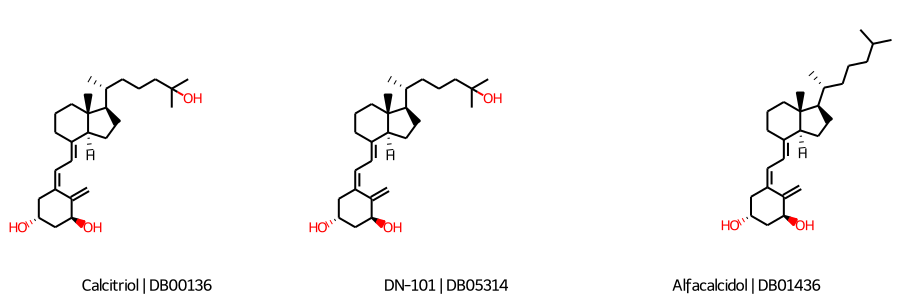

In [64]:
hit_mols = [drugs[index] for index, similarity in vdr_ligand_hits[1][1]]
Draw.MolsToGridImage(hit_mols, molsPerRow=3, subImgSize=(300,300),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in hit_mols])

In [65]:
drugs_hitcounts = {}
for ligand, hits in vdr_ligand_hits:
    for hit, similarity in hits:
        drugs_hitcounts[hit] = drugs_hitcounts.get(hit, 0) + 1
drugs_hitcounts

{1372: 4,
 4672: 4,
 1857: 4,
 28: 24,
 4454: 24,
 1247: 23,
 3054: 3,
 2344: 2,
 2374: 2,
 3200: 2,
 4358: 2,
 6516: 2}

In [67]:
ordered_drugs_hitcounts = sorted(drugs_hitcounts.keys(), key=lambda x: drugs_hitcounts[x], reverse=True)
ordered_drugs_hitcounts

[28, 4454, 1247, 1372, 4672, 1857, 3054, 2344, 2374, 3200, 4358, 6516]

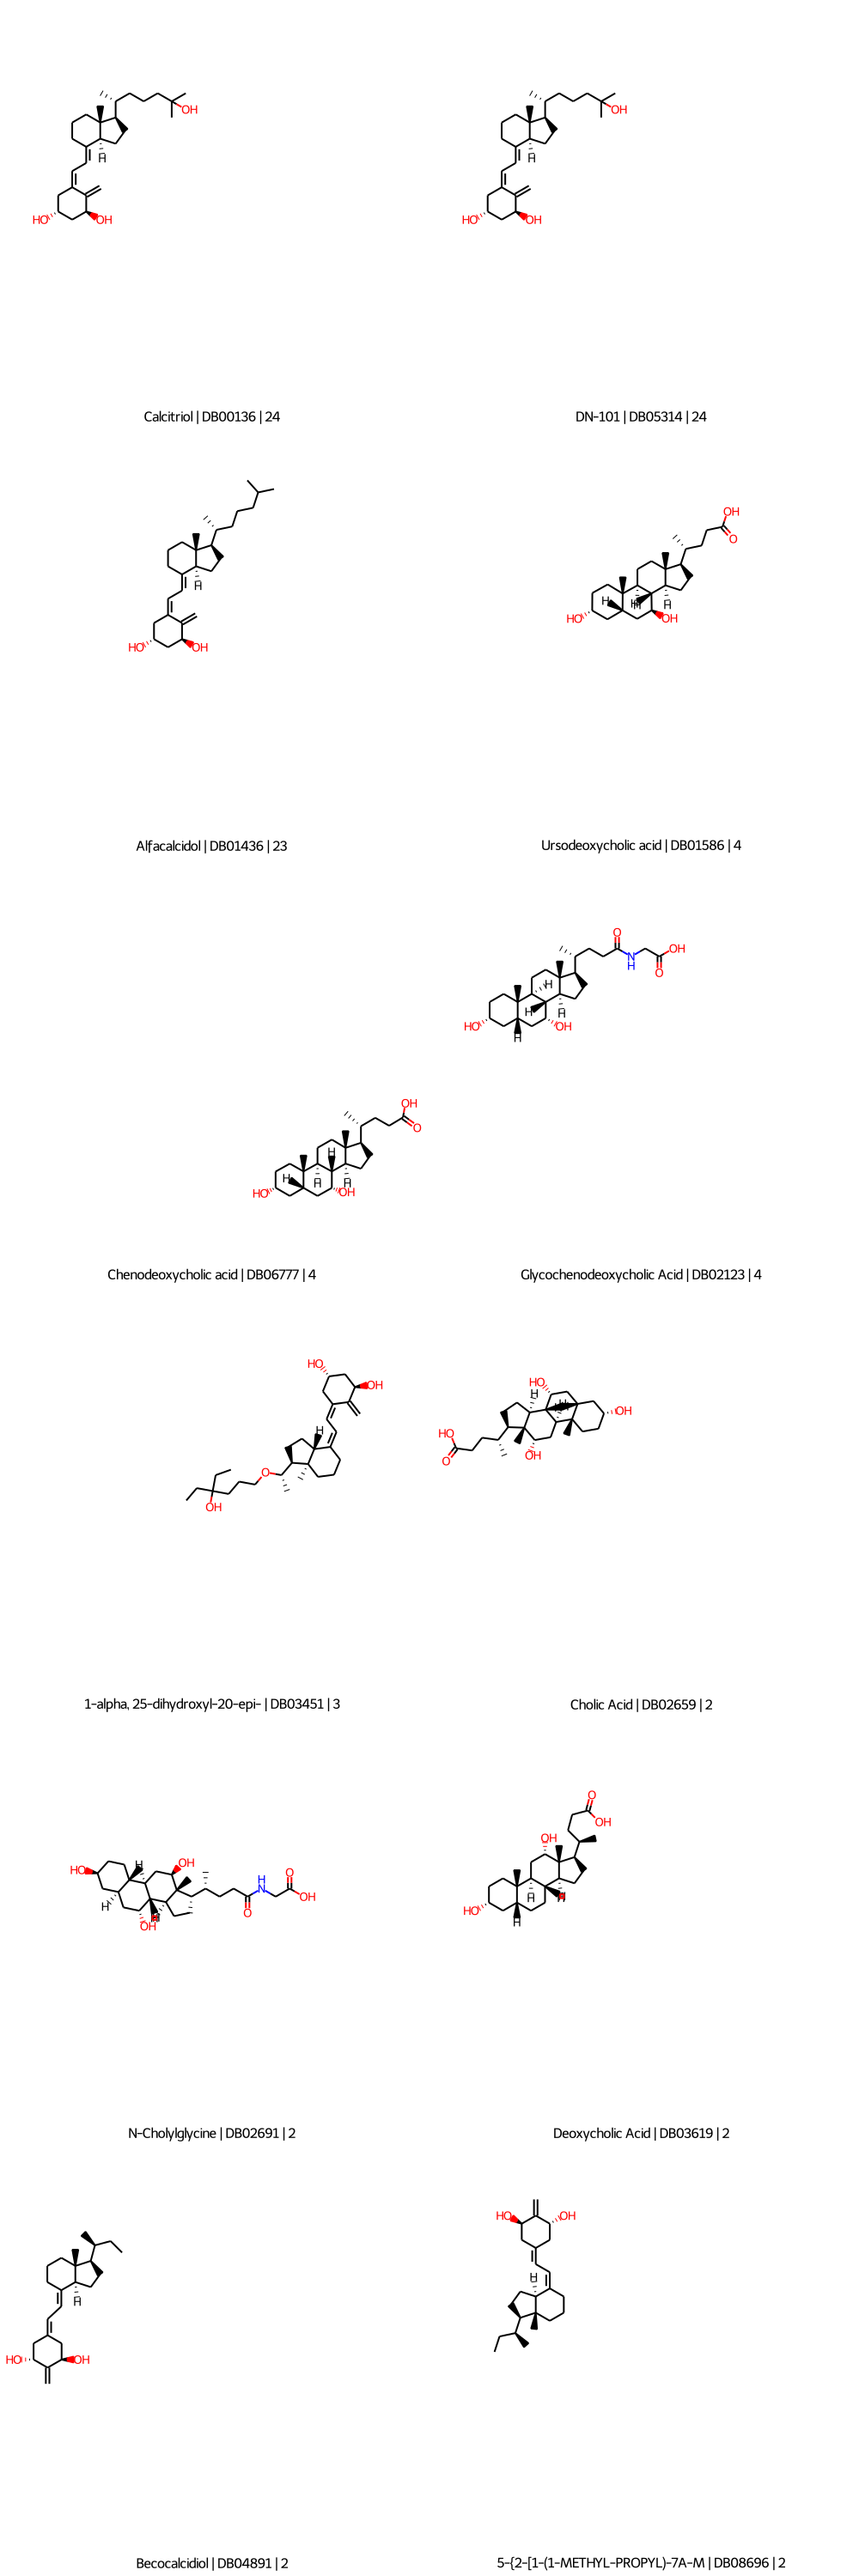

In [35]:
hit_mols = [drugs[i] for i in ordered_drugs_hitcounts]
Draw.MolsToGridImage(hit_mols, molsPerRow=2, subImgSize=(500,500),
                     legends=["{} | {} | {}".format(drugs[i].GetProp('GENERIC_NAME')[:30], # just cut off too long IUPAC stuff
                                                    drugs[i].GetProp('DRUGBANK_ID'),
                                                    drugs_hitcounts[i])
                              for i in ordered_drugs_hitcounts])

In [68]:
def distance_function(index1, index2, *args, fingerprints=vdr_ligands_ecfp,
                      metric=DataStructs.TanimotoSimilarity):
    return 1 - DataStructs.FingerprintSimilarity(fingerprints[index1],
                                                 fingerprints[index2],
                                                 metric=metric)

In [85]:

picker = MaxMinPicker()
picked = list(picker.LazyPick(distance_function, len(vdr_ligands), 45))
picked

[411,
 400,
 202,
 271,
 358,
 70,
 586,
 136,
 174,
 466,
 555,
 253,
 216,
 272,
 281,
 470,
 362,
 401,
 184,
 340,
 170,
 83,
 507,
 324,
 442,
 427,
 406,
 479,
 629,
 554,
 356,
 120,
 107,
 456,
 157,
 183,
 172,
 140,
 251,
 312,
 176,
 245,
 276,
 264,
 346]

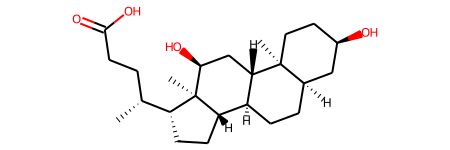

In [86]:
vdr_ligands[411]

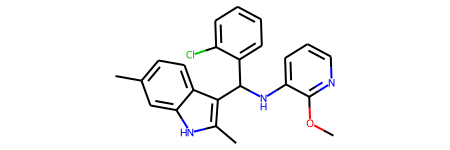

In [87]:
vdr_ligands[400]

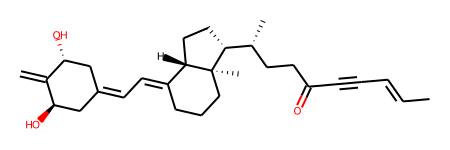

In [88]:
vdr_ligands[346]

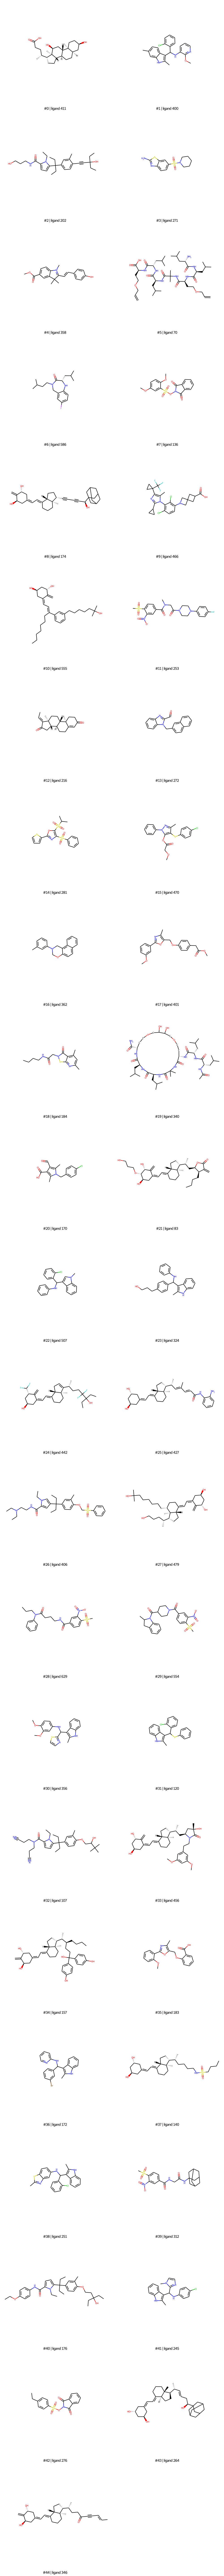

In [89]:
Draw.MolsToGridImage([vdr_ligands[i] for i in picked], molsPerRow=2, subImgSize=(500,500),
                     legends=["#{} | ligand {}".format(i, hit) for i, hit in enumerate(picked)])

In [90]:

picker = MaxMinPicker()
picked = list(picker.LazyPick(distance_function, len(vdr_ligands), 20))
picked

[196,
 234,
 317,
 271,
 546,
 216,
 436,
 466,
 70,
 362,
 132,
 276,
 326,
 187,
 88,
 358,
 281,
 184,
 470,
 340]

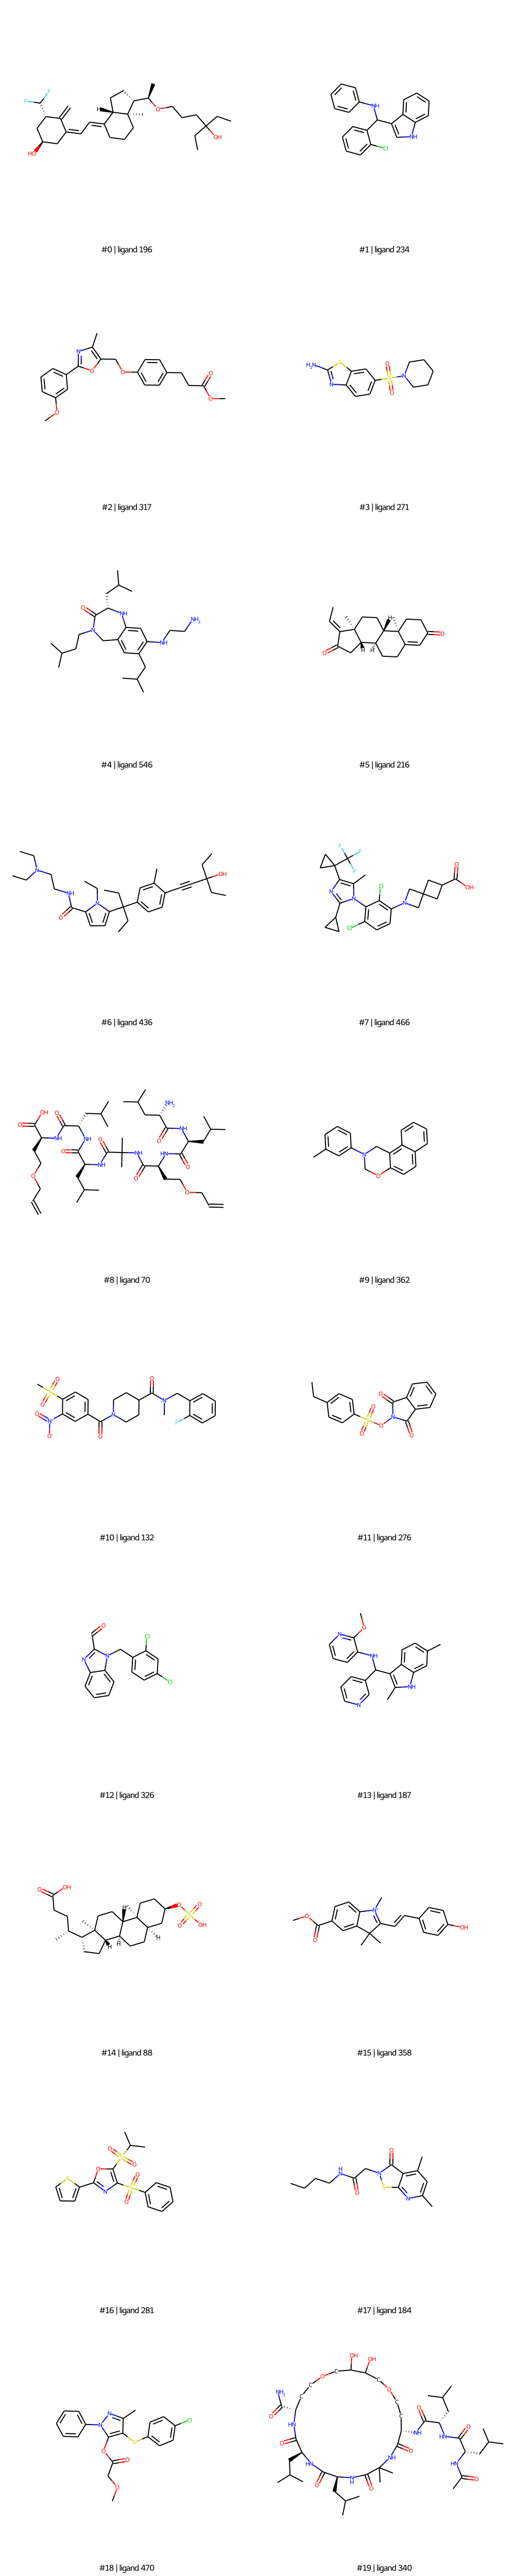

In [91]:
Draw.MolsToGridImage([vdr_ligands[i] for i in picked], molsPerRow=2, subImgSize=(500,500),
                     legends=["#{} | ligand {}".format(i, hit) for i, hit in enumerate(picked)])

Nejak nemůžu vymyslet co bude znamenat posledni struktura, 
protože když to pouštím víc krát tak někdy ta poslední struktura je podobna
na tu první a někdy jsou uplně odlišne